In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import geopandas as gpd
import pycountry_convert as pc
import random
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from shapely.geometry import Point

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [10]:
airports=pd.read_csv('csv_airports_v1.csv')
routes=pd.read_csv('csv_routes_v1.csv')
display(airports.head(5))
display(routes.head(5))

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby


,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2


## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [11]:
print(airports.info())
print(routes.info())
airports=airports.replace('\\N', np.nan)
# display(airports)

print(airports.info())
print(routes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [12]:
# создадим словарь для стран, континент для которых не предлагается функцией кантри_ту_континент 
# находила с помощью iata_arports[iata_arports["Continents"].isna()]["Country"].unique()

slovar={"Cote d'Ivoire":'Africa',
        'Congo (Brazzaville)':'Africa',
        'Congo (Kinshasa)':'Africa',
        'Saint Helena':'Africa',
        'Reunion':'Africa',
        'Midway Islands':'North America',
        'Antarctica':'Antarctica',
        'Virgin Islands':'North America',
        'Netherlands Antilles':'South America',
        'Burma':'Asia',
        'East Timor':'Asia',
        'Johnston Atoll':'Oceania',
        'Western Sahara':'Africa',
        'Wake Island':'Oceania'}

In [13]:
iata_arports=pd.DataFrame(airports[~airports['IATA'].isna()])

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return slovar[country_name]
        


iata_arports['Continents']=iata_arports['Country'].map(country_to_continent)
iata_arports

C:\Users\val04\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\val04\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,14097,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU,WABV,-3.739560,137.031998,7348,NaN,NaN,NaN,Asia
7686,14100,Ramon Airport,Eilat,Israel,ETM,LLER,29.723694,35.011416,288,NaN,NaN,NaN,Asia
7687,14101,Rustaq Airport,Al Masna'ah,Oman,MNH,OORQ,23.640556,57.487500,349,NaN,NaN,NaN,Asia
7688,14102,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,NaN,NaN,NaN,Asia


In [14]:
iata_arports["Continents"].unique()

array(['Oceania', 'North America', 'Europe', 'Africa', 'South America',
       'Asia', 'Antarctica'], dtype=object)

## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

In [18]:
a=iata_arports["Continents"].unique()
random_continent=random.choice(a)
print('Случайный континент:',random_continent)
filtered_airports = iata_arports[iata_arports['Continents'] == random_continent]


Случайный континент: North America


In [19]:
fig = go.Figure(go.Scattermapbox(lat=filtered_airports.Latitude, lon=filtered_airports.Longitude))

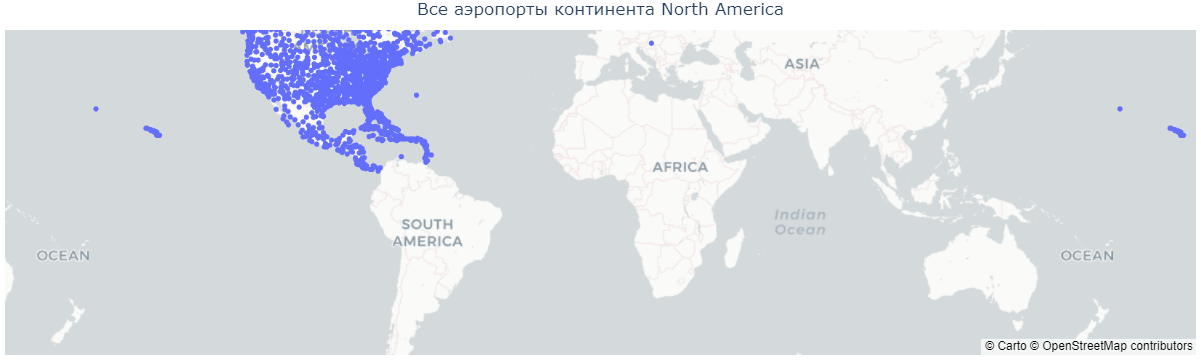

In [28]:
fig.update_layout(mapbox_style='carto-positron',margin=dict(t=30, b=5, l=5, r=5),title=f"Все аэропорты континента {random_continent}",title_x=0.5)
fig.show()

In [29]:
uniq=iata_arports["Continents"].unique()

C:\Users\val04\AppData\Local\Temp\ipykernel_18744\1770410966.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



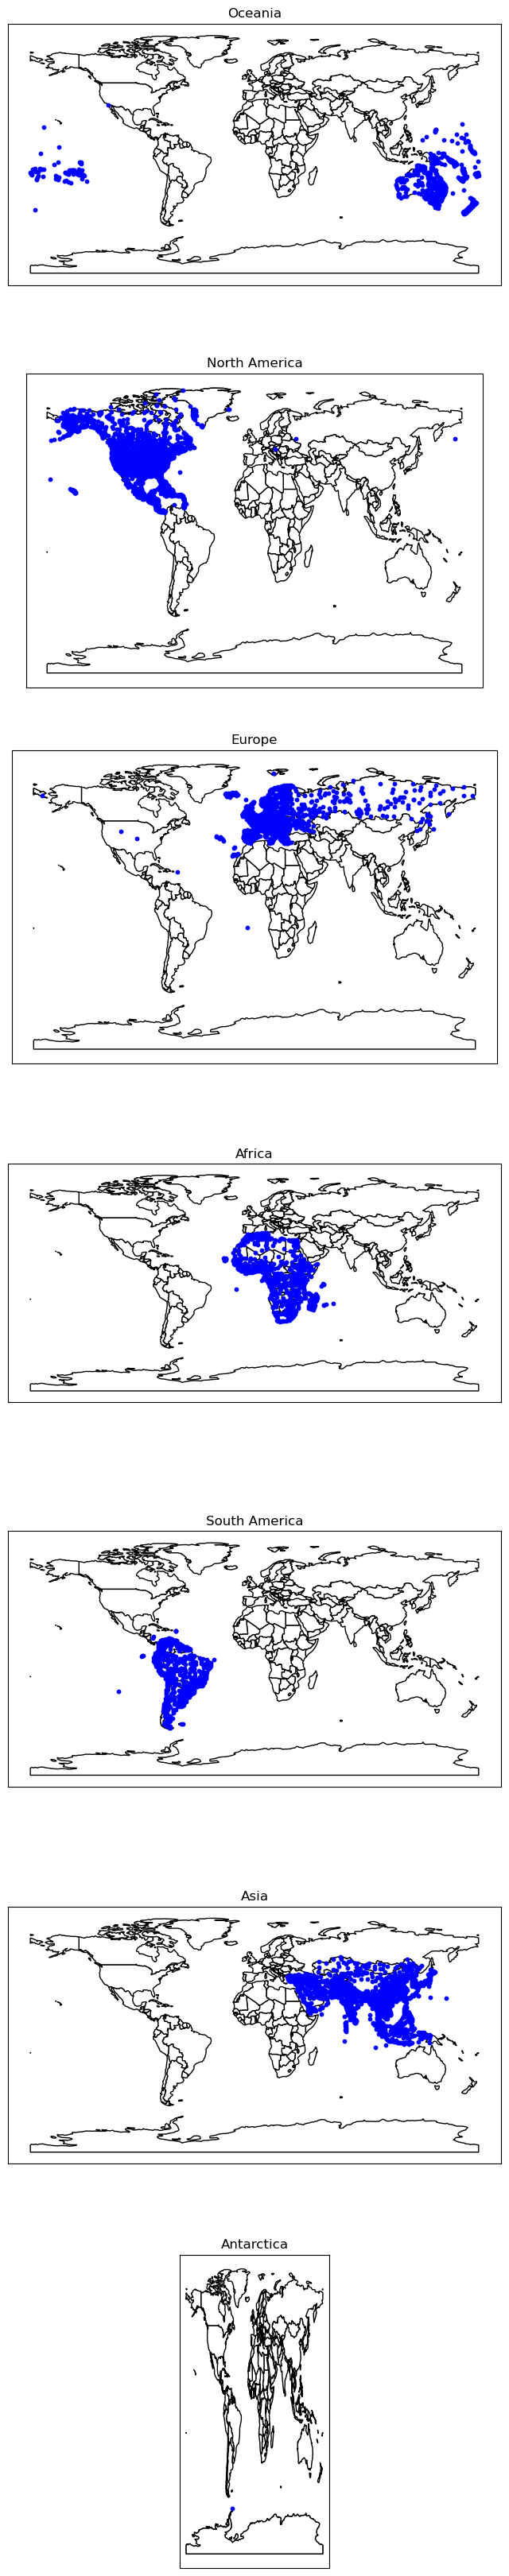

In [30]:
def risunok (df):
    uniq=df["Continents"].unique()
    fig, axs = plt.subplots(nrows=len(uniq), ncols=1,figsize=(8, 6*len(uniq)))
    #  возьмем карту мира из геопандаса
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    for ax in axs:
            world.plot(ax=ax, color='white', edgecolor='black')
    #  для каждого континента поставим точки на карте согласно координатам
    for i, continent in enumerate(uniq):
            continent_data = df[df['Continents'] == continent]
            continent_geometry = gpd.points_from_xy(continent_data['Longitude'], continent_data['Latitude'])
            world[world.continent == continent].plot(ax=axs[i],color='white', edgecolor='black')
            axs[i].scatter(continent_data['Longitude'], continent_data['Latitude'], color='blue', s=10)
            axs[i].set_title(continent)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
    plt.show()
risunok(iata_arports)
        
# антарктику почему-то сплющило немножко.. 

Ошибки в данных: неправильно определены континенты/страны для некоторых аэропортов. 

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [38]:
b=iata_arports["Continents"].unique() 
random_continent2=random.choice(b)
print('Случайный континент:',random_continent2)

Случайный континент: Asia


In [39]:
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2


In [40]:
poleti=routes.copy(deep=True)

In [41]:
vileti=poleti.groupby('Source airport')['Source airport ID'].count().reset_index().rename(columns={'Source airport ID':'Value of departures'})
vileti.head(3)

,Source airport,Value of departures
0,AAE,9
1,AAL,20
2,AAN,2


In [42]:
prileti=poleti.groupby('Destination airport')['Destination airport ID'].count().reset_index().rename(columns={'Destination airport ID':'Value of arrivals'})
prileti.head(3)

,Destination airport,Value of arrivals
0,AAE,9
1,AAL,21
2,AAN,2


Присоединим эти столбцы к основному датафрейму, чтобы потом обрезать его по случайному континенту. Добавим лефт/райт он, так как названия столбцов отличаются.

In [43]:
new_iata=iata_arports.merge(vileti,how='left',left_on='IATA',right_on='Source airport')
new_iata=new_iata.merge(prileti,how='left',left_on='IATA',right_on='Destination airport')
new_iata.head(3)

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents,Source airport,Value of departures,Destination airport,Value of arrivals
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania,MAG,8.0,MAG,8.0
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania,HGU,10.0,HGU,12.0
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania,LAE,11.0,LAE,11.0


Получим необходимую таблицу, отсортированную по названиям стран.  ОТВЕТ 5.1:

In [44]:
strani_continenta=new_iata[new_iata['Continents']==random_continent2].groupby('Country').agg({'Value of departures':'sum','Value of arrivals':'sum'}).sort_index()
strani_continenta.head()

,Value of departures,Value of arrivals
Country,,
Afghanistan,43.0,41.0
Armenia,46.0,46.0
Azerbaijan,72.0,73.0
Bahrain,84.0,86.0
Bangladesh,104.0,105.0


Задание 5.2:

In [45]:
strani_continenta['total']=strani_continenta['Value of departures']+strani_continenta['Value of arrivals']
strani_continenta=strani_continenta.reset_index()

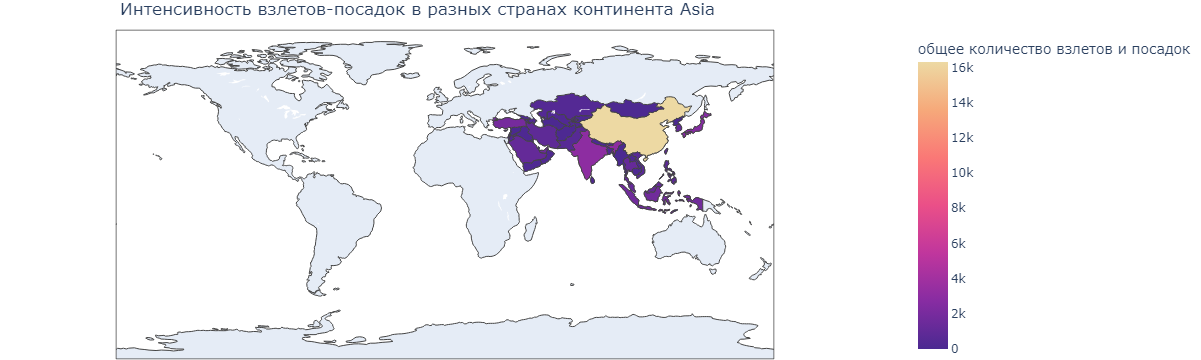

In [48]:
fig = px.choropleth(strani_continenta, color="total", locations="Country", locationmode="country names",
                         color_continuous_scale="agsunset", labels={'total': 'общее количество взлетов и посадок '})

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":1},title=f"Интенсивность взлетов-посадок в разных странах континента {random_continent2}",title_x=0.1)
fig.show()

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [49]:
new_iata['total']=new_iata['Value of departures']+new_iata['Value of arrivals']

In [50]:
top10=new_iata.groupby(['Continents','Name of airport','Country','City','IATA'])['total'].sum().reset_index().set_index(['Continents','Name of airport']).sort_values(by=['Continents','total'],ascending=[True,False]).groupby('Continents').head(10)
display(top10)

Country  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      South Africa   
              Cairo International Airport                                Egypt   
              Jomo Kenyatta International Airport                        Kenya   
              Mohammed V International Airport                         Morocco   
              Addis Ababa Bole International Airport                  Ethiopia   
...                                                                        ...   
South America Simón Bolívar International Airport                    Venezuela   
              Comodoro Arturo Merino Benítez International Ai...         Chile   
              Ministro Pistarini International Airport               Argentina   
              Jorge Newbery Airpark                                  Argentina   
              Deputado Luiz Eduardo Magalhães International A...        Brazil   

                                                                          City  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      Johannesburg   
              Cairo International Airport                                Cairo   
              Jomo Kenyatta International Airport                      Nairobi   
              Mohammed V International Airport                      Casablanca   
              Addis Ababa Bole International Airport               Addis Ababa   
...                                                                        ...   
South America Simón Bolívar International Airport                      Caracas   
              Comodoro Arturo Merino Benítez International Ai...      Santiago   
              Ministro Pistarini International Airport            Buenos Aires   
              Jorge Newbery Airpark                               Buenos Aires   
              Deputado Luiz Eduardo Magalhães International A...      Salvador   

                                                                 IATA  total  
Continents    Name of airport                                                 
Africa        OR Tambo International Airport                      JNB  321.0  
              Cairo International Airport                         CAI  303.0  
              Jomo Kenyatta International Airport                 NBO  258.0  
              Mohammed V International Airport                    CMN  250.0  
              Addis Ababa Bole International Airport              ADD  214.0  
...                                                               ...    ...  
South America Simón Bolívar International Airport                 CCS  181.0  
              Comodoro Arturo Merino Benítez International Ai...  SCL  158.0  
              Ministro Pistarini International Airport            EZE  149.0  
              Jorge Newbery Airpark                               AEP  128.0  
              Deputado Luiz Eduardo Magalhães International A...  SSA  116.0  

[61 rows x 4 columns]

##### 6.1 Полный датафрейм:

In [51]:
pd.set_option('display.max_rows', None)
print('Топ-10 самых загруженных аэропортов каждого континента')
display(top10)

Топ-10 самых загруженных аэропортов каждого континента


Country  \
Continents    Name of airport                                                            
Africa        OR Tambo International Airport                              South Africa   
              Cairo International Airport                                        Egypt   
              Jomo Kenyatta International Airport                                Kenya   
              Mohammed V International Airport                                 Morocco   
              Addis Ababa Bole International Airport                          Ethiopia   
              Houari Boumediene Airport                                        Algeria   
              Tunis Carthage International Airport                             Tunisia   
              Menara Airport                                                   Morocco   
              Léopold Sédar Senghor International Airport                      Senegal   
              Murtala Muhammed International Airport                           Nigeria   
Antarctica    Teniente Rodolfo Marsh Martin Base                            Antarctica   
Asia          Beijing Capital International Airport                              China   
              Shanghai Pudong International Airport                              China   
              Singapore Changi Airport                                       Singapore   
              Incheon International Airport                                South Korea   
              Istanbul Airport                                                  Turkey   
              Dubai International Airport                         United Arab Emirates   
              Hong Kong International Airport                                Hong Kong   
              Guangzhou Baiyun International Airport                             China   
              Suvarnabhumi Airport                                            Thailand   
              Chengdu Shuangliu International Airport                            China   
Europe        London Heathrow Airport                                   United Kingdom   
              Charles de Gaulle International Airport                           France   
              Frankfurt am Main Airport                                        Germany   
              Amsterdam Airport Schiphol                                   Netherlands   
              Barcelona International Airport                                    Spain   
              Munich Airport                                                   Germany   
              London Gatwick Airport                                    United Kingdom   
              Leonardo da Vinci–Fiumicino Airport                                Italy   
              Adolfo Suárez Madrid–Barajas Airport                               Spain   
              Domodedovo International Airport                                  Russia   
North America Hartsfield Jackson Atlanta International Airport           United States   
              Chicago O'Hare International Airport                       United States   
              Los Angeles International Airport                          United States   
              Dallas Fort Worth International Airport                    United States   
              John F Kennedy International Airport                       United States   
              Denver International Airport                               United States   
              Miami International Airport                                United States   
              Lester B. Pearson International Airport                           Canada   
              Charlotte Douglas International Airport                    United States   
              Philadelphia International Airport                         United States   
Oceania       Sydney Kingsford Smith International Airport                   Australia   
              Brisbane International Airport                                 Australia   
              Melbourne Inter

In [52]:
top10_new=top10.merge(new_iata[['Continents','Latitude','Longitude','IATA']],how='left',on='IATA')

In [53]:
pd.set_option('display.max_rows',10)
top10_new

,Country,City,IATA,total,Continents,Latitude,Longitude
0,South Africa,Johannesburg,JNB,321.0,Africa,-26.139200,28.246000
1,Egypt,Cairo,CAI,303.0,Africa,30.121901,31.405600
2,Kenya,Nairobi,NBO,258.0,Africa,-1.319240,36.927799
3,Morocco,Casablanca,CMN,250.0,Africa,33.367500,-7.589970
4,Ethiopia,Addis Ababa,ADD,214.0,Africa,8.977890,38.799301
...,...,...,...,...,...,...,...
56,Venezuela,Caracas,CCS,181.0,South America,10.601194,-66.991222
57,Chile,Santiago,SCL,158.0,South America,-33.393002,-70.785797
58,Argentina,Buenos Aires,EZE,149.0,South America,-34.822200,-58.535800
59,Argentina,Buenos Aires,AEP,128.0,South America,-34.559200,-58.415600


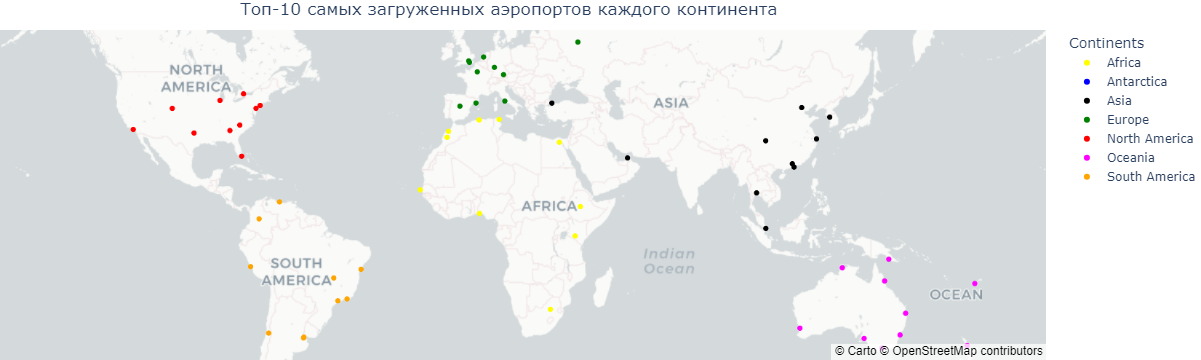

In [56]:
colors={
    'Africa':'yellow',
    'South America':'orange',
    'North America':'red',
    'Antarctica':'blue',
    'Europe':'green',
    'Oceania':'magenta',
    'Asia':'black'
    }
fig = px.scatter_mapbox(top10_new, lat="Latitude", lon="Longitude", color="Continents", 
                        color_discrete_map=colors, zoom=1)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},title="Топ-10 самых загруженных аэропортов каждого континента",title_x=0.2)
fig.show(config={"displayModeBar": False})
# update_map(top10_new)

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [57]:
model=pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_type_designators')[0][['IATA type code','Model']]
display(model.head(5))

,IATA type code,Model
0,A4F,Antonov An-124 Ruslan
1,A40,Antonov An-140
2,A81,Antonov An-148
3,A58,Antonov An-158
4,31N,Airbus A319neo


In [58]:
display(routes.head(5))

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2
3,2B,410,CEK,2968,OVB,4078,CR2
4,2B,410,DME,4029,KZN,2990,CR2


Берем первый борт в Equipment.

In [59]:
routes['Equipment'] = routes['Equipment'].str.split().str[0]

In [60]:
kolvo=routes.groupby('Equipment')['Destination airport ID'].count().reset_index().rename(columns={'Destination airport ID':'Value of arrivals'})
kolvo.head(3)

,Equipment,Value of arrivals
0,100,407
1,141,2
2,142,10


In [61]:
kolvo=kolvo.sort_values(by=['Value of arrivals'],ascending=False)
kolvo.head(10)

,Equipment,Value of arrivals
9,320,11865
33,738,8520
8,319,5205
37,73H,2566
32,737,2453
10,321,2145
43,73W,1812
102,CRJ,1599
120,E90,1391
81,AT7,1387


In [62]:
kolvo=kolvo.merge(model,left_on='Equipment',right_on='IATA type code',how='left')
kolvo.head(10)

,Equipment,Value of arrivals,IATA type code,Model
0,320,11865,320,Airbus A320
1,738,8520,738,Boeing 737-800
2,319,5205,319,Airbus A319
3,73H,2566,73H,Boeing 737-800 Winglets
4,737,2453,NaN,NaN
5,321,2145,321,Airbus A321
6,73W,1812,73W,Boeing 737-700 Winglets
7,CRJ,1599,NaN,NaN
8,E90,1391,E90,Embraer 190 / Lineage 1000
9,AT7,1387,AT7,Aerospatiale/Alenia ATR 72-201/-202


In [63]:
kolvo=kolvo[['Model','Value of arrivals']]
kolvo.loc[4,'Model']='Boeing 737-?'
kolvo.loc[7,'Model']='Canadair Regional Jet'
print('10 самых популярных моделей самолетов')
display(kolvo.head(10))

10 самых популярных моделей самолетов


,Model,Value of arrivals
0,Airbus A320,11865
1,Boeing 737-800,8520
2,Airbus A319,5205
3,Boeing 737-800 Winglets,2566
4,Boeing 737-?,2453
5,Airbus A321,2145
6,Boeing 737-700 Winglets,1812
7,Canadair Regional Jet,1599
8,Embraer 190 / Lineage 1000,1391
9,Aerospatiale/Alenia ATR 72-201/-202,1387
